In [ ]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
!sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 파일을 열 때마다 아래 코드 실행해주세요. 
# 드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')
# 참고: http://growthj.link/python-%EA%B5%AC%EA%B8%80-colab%EC%9C%BC%EB%A1%9C-pd-read_csv-%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95/

Mounted at /content/drive


# 2. 데이터 불러오기

In [ ]:
#불러올 파일의 경로를 filename 변수에 저장(변수 이름은 맘대로 하세여)
#pos_rev = pd.read_csv('/content/drive/MyDrive/SSG_positive_reviews.csv')
#nega_rev = pd.read_csv('/content/drive/MyDrive/SSG_negative_reviews.csv')

In [ ]:
ssg_total_data = pd.read_csv('/content/drive/MyDrive/빅데이터분석_마케팅2팀/colab/dataset/SSG_모든음식_리뷰csv/SSG_pos+neg_total_review.csv')

In [ ]:
ssg_total_data.head()

,comment,label
0,쓰윽잘받았어요,0
1,이번 배송은 다 녹아서 왔어요,0
2,배송시간 못 맞춰서 분뒤에 개봉했더니 배송된 냉동만두가 거의 해동상태 고객센터 하...,0
3,품질 좋은거 맞냐구 말을 해봐라,0
4,맛있는데 먹고 나면 속이 안좋아요,0


In [ ]:
len(ssg_total_data)

53184

In [ ]:
train_data, test_data = train_test_split(ssg_total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 39888
테스트용 리뷰의 개수 : 13296


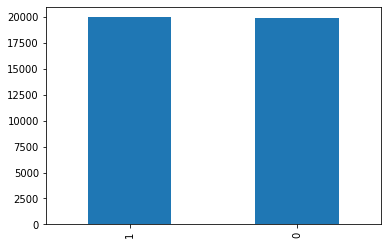

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  19930
1      1  19958


In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
train_data.head(5)

,comment,label
5784,아 대박 맛 없습니다,0
35190,살살녹아요,1
12488,저렴하게 구매했습니다,0
50795,매번 주문하는 제품이에요,1
11416,그닥이에요 밀가루맛 많이나고 맛없어요 양은 많음돈 더주고 맛있는 어묵 사먹는게 나아요,0


In [ ]:
test_data.head(5)

,comment,label
42973,아이들이 좋아하는 맛,1
4305,별로,0
4813,그냥그냥 그래요 딱히 맛은,0
9281,그저그래요 크기노 작고,0
23685,다른데 것보다 밍밍해요 별로,0


In [ ]:
# 불용어 사전 텍스트파일 가져와서 stopwords2 라는 리스트로 만듦
f = open("/content/drive/MyDrive/빅데이터분석_마케팅2팀/colab/dataset/stopwordskr.txt", 'r')
lines = f.readlines()
stopwords_ex = []
for line in lines:
    line = line.replace('\n', '')
    stopwords_ex.append(line)
f.close()

In [ ]:
# # 불용어 사전 텍스트파일 가져와서 stopwords2 라는 리스트로 만듦
# f = open("/content/drive/MyDrive/빅데이터분석_마케팅2팀/colab/dataset/근성2.txt", 'r')
# lines = f.readlines()
# stopwords_ex2 = []
# for line in lines:
#     line = line.replace('\n', '')
#     stopwords_ex2.append(line)
# f.close()

In [ ]:
# stopwordsall = stopwords_ex + stopwords_ex2

In [ ]:
# stopwords = list(set(stopwordsall))

In [ ]:
# len(stopwordsall)

779

In [ ]:
train_data['tokenized'] = train_data['comment'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords_ex])
test_data['tokenized'] = test_data['comment'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords_ex])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
train_data.head()

,comment,label,tokenized
5784,아 대박 맛 없습니다,0,"[대박, 맛, 없]"
35190,살살녹아요,1,"[살살, 녹, 아요]"
12488,저렴하게 구매했습니다,0,"[저렴, 게, 구매, 했]"
50795,매번 주문하는 제품이에요,1,"[주문, 는, 제품, 에요]"
11416,그닥이에요 밀가루맛 많이나고 맛없어요 양은 많음돈 더주고 맛있는 어묵 사먹는게 나아요,0,"[닥, 에요, 밀가루, 맛, 많이, 고, 맛없, 어요, 양, 은, 많, 음, 돈, ..."


In [ ]:
test_data.head()

,comment,label,tokenized
42973,아이들이 좋아하는 맛,1,"[좋, 는, 맛]"
4305,별로,0,[별로]
4813,그냥그냥 그래요 딱히 맛은,0,"[그냥, 그냥, 그래요, 딱히, 맛, 은]"
9281,그저그래요 크기노 작고,0,"[그래요, 크기, 노, 작, 고]"
23685,다른데 것보다 밍밍해요 별로,0,"[데, 보다, 밍밍, 별로]"


In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
negative_words

array(['대박', '맛', '없', ..., '기편', '해서', '자주'], dtype='<U32')

In [ ]:
positive_words

array(['살살', '녹', '아요', ..., '정말', '맛있', '어요'], dtype='<U32')

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('는', 5558), ('먹', 5304), ('고', 5153), ('맛', 4849), ('은', 4553), ('네요', 4042), ('어요', 3688), ('좋', 3565), ('아요', 3376), ('는데', 2975), ('도', 2856), ('그냥', 2078), ('한', 2030), ('너무', 2005), ('안', 1924), ('게', 1903), ('요', 1896), ('별로', 1777), ('없', 1701), ('구매', 1686)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 8096), ('아요', 5527), ('어요', 5479), ('먹', 5355), ('맛있', 5005), ('고', 4005), ('는', 3793), ('구매', 2265), ('잘', 2237), ('게', 2180), ('도', 2164), ('네요', 1916), ('합니다', 1853), ('은', 1608), ('맛', 1511), ('있', 1467), ('자주', 1371), ('요', 1299), ('입니다', 1272), ('제품', 1191)]


긍정 리뷰의 평균 길이 : 7.460867822427097
부정 리뷰의 평균 길이 : 10.624435524335173


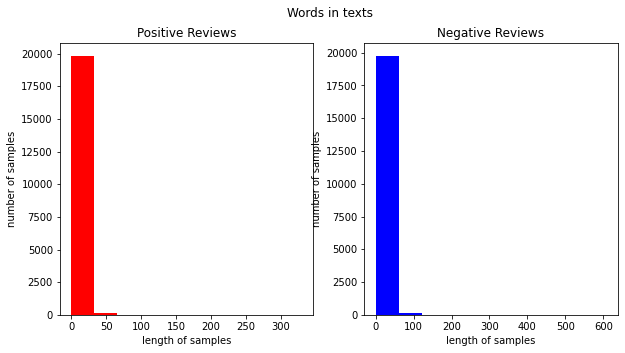

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 9608
등장 빈도가 1번 이하인 희귀 단어의 수: 4166
단어 집합에서 희귀 단어의 비율: 43.359700249791835
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.1551397619291888


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5444


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 608
리뷰의 평균 길이 : 9.041541315683915


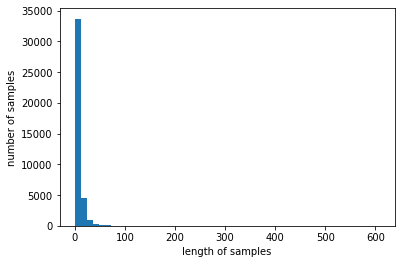

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 70
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 70 이하인 샘플의 비율: 99.63648215002006


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
532/532 [==============================] - 14s 11ms/step - loss: 0.4722 - acc: 0.7832 - val_loss: 0.3701 - val_acc: 0.8433

Epoch 00001: val_acc improved from -inf to 0.84332, saving model to best_model.h5
Epoch 2/15
532/532 [==============================] - 5s 9ms/step - loss: 0.3582 - acc: 0.8471 - val_loss: 0.3648 - val_acc: 0.8468

Epoch 00002: val_acc improved from 0.84332 to 0.84683, saving model to best_model.h5
Epoch 3/15
532/532 [==============================] - 5s 9ms/step - loss: 0.3426 - acc: 0.8553 - val_loss: 0.3575 - val_acc: 0.8523

Epoch 00003: val_acc improved from 0.84683 to 0.85234, saving model to best_model.h5
Epoch 4/15
532/532 [==============================] - 5s 9ms/step - loss: 0.3295 - acc: 0.8603 - val_loss: 0.3577 - val_acc: 0.8506

Epoch 00004: val_acc did not improve from 0.85234
Epoch 5/15
532/532 [==============================] - 5s 9ms/step - loss: 0.3249 - acc: 0.8626 - val_loss: 0.3557 - val_acc: 0.8501

Epoch 00005: val_acc did not im

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

416/416 [==============================] - 2s 4ms/step - loss: 0.3568 - acc: 0.8517

 테스트 정확도: 0.8517


In [ ]:
loaded_model = load_model('/content/drive/MyDrive/빅데이터분석_마케팅2팀/colab/merrychristmas_best_model.h5')

In [ ]:
#불러올 파일의 경로를 filename 변수에 저장(변수 이름은 맘대로 하세여)
kurly1 = pd.read_csv('/content/drive/MyDrive/빅데이터분석_마케팅2팀/colab/dataset/kurly_review_csv/shrimp_review_kurly.csv')
len(kurly1)

90

In [ ]:
kurly1.head()

,comment,date
0,떡볶이랑 같이 해서 떡볶이소스 묻혀서 먹었는데 맛나욯 튀김옷이 좀 두껍긴 하네요,2020-12-16
1,카레 만들어서 에어프라이어에 구운 새우꼬체를 얹어 먹었더니근사한 한끼가 되었어요,2020-12-16
2,맛이 아주 근사하진 않지만가격이 좋네요,2020-12-14
3,맛있어요 다만 익히는데 생각보다 오래걸리네요,2020-12-13
4,그냥 새우에 빵가루 튀김옷 붙여놓은 느낌튀김옷에서 허브갈릭향이 나서 새우와 맛에 조...,2020-12-13


In [ ]:
def kurly_predict(new_sentence):
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords_ex] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    return score

In [ ]:
kurly1.drop_duplicates(subset = ['comment'], inplace=True) # 중복 제거
kurly1['comment'] = kurly1['comment'].str.replace("[^가-힣 ]","") # 정규 표현식 수행
kurly1['comment'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
kurly1 = kurly1.dropna(how='any') # Null 값 제거
print('전처리 후 샘플의 개수 :',len(kurly1))

전처리 후 샘플의 개수 : 89


In [ ]:
kurly1_label=[]
for i in kurly1.comment:
  if kurly_predict(i)>0.5: 
    kurly1_label.append(1)
  else:
    kurly1_label.append(0)

In [ ]:
kurly1['label'] = kurly1_label

In [ ]:
kurly1[kurly1.label==0].count()

comment    39
date       39
label      39
dtype: int64

In [ ]:
kurly1[kurly1.label==1].count()

comment    50
date       50
label      50
dtype: int64

In [ ]:
kurly1.head()

,comment,date,label
0,떡볶이랑 같이 해서 떡볶이소스 묻혀서 먹었는데 맛나욯 튀김옷이 좀 두껍긴 하네요,2020-12-16,0
1,카레 만들어서 에어프라이어에 구운 새우꼬체를 얹어 먹었더니근사한 한끼가 되었어요,2020-12-16,1
2,맛이 아주 근사하진 않지만가격이 좋네요,2020-12-14,1
3,맛있어요 다만 익히는데 생각보다 오래걸리네요,2020-12-13,1
4,그냥 새우에 빵가루 튀김옷 붙여놓은 느낌튀김옷에서 허브갈릭향이 나서 새우와 맛에 조...,2020-12-13,0


In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(kurly1)

In [ ]:
# type(kurly1)

pandas.core.frame.DataFrame

In [ ]:
kurly1.to_csv("shrimp_kurly_predicted.csv", index=False, encoding="utf-8-sig")